**Naïve Bayes Classifier**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Load Dataset**

In [2]:
# Load sample Iris dataset
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Data Preparation**

In [3]:
# Define features (X) and target (y)
X = df.drop(columns='target')
y = df['target']

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train Naïve Bayes**

In [4]:
# Gaussian Naive Bayes (for continuous features)
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
y_pred_gnb = gnb.predict(X_test_scaled)

# Multinomial Naive Bayes (for discrete/count features)
mnb = MultinomialNB()
mnb.fit(np.abs(X_train_scaled), y_train)  # ensure non-negative
y_pred_mnb = mnb.predict(np.abs(X_test_scaled))

# Bernoulli Naive Bayes (for binary features)
bnb = BernoulliNB()
bnb.fit((X_train_scaled > 0).astype(int), y_train)
y_pred_bnb = bnb.predict((X_test_scaled > 0).astype(int))


**Evaluate Accuracy**

In [5]:
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))


GaussianNB Accuracy: 1.0
MultinomialNB Accuracy: 0.5526315789473685
BernoulliNB Accuracy: 0.8421052631578947


**Classification Report**

In [6]:
print("\nGaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))



GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



**Confusion Matrix Visualization**

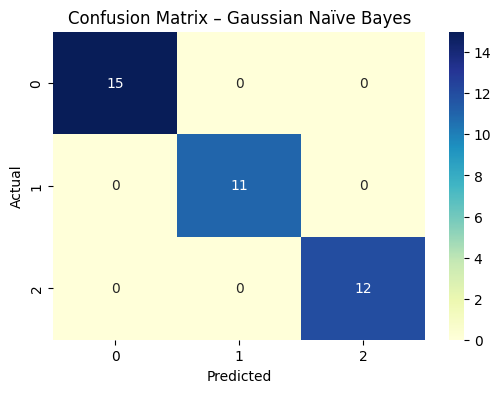

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_gnb), annot=True, cmap='YlGnBu', fmt='d')
plt.title("Confusion Matrix – Gaussian Naïve Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
